### OrdinalEncodor

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('data/Amazon Sale Report.csv')

/tmp/ipykernel_5487/2490074937.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/Amazon Sale Report.csv')


In [5]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [6]:
dff=pd.DataFrame(df['ship-service-level'])

In [8]:
dff.head()
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 1 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ship-service-level  128975 non-null  object
dtypes: object(1)
memory usage: 1007.7+ KB


In [10]:
dff.drop(np.arange(2000,len(dff)),axis=0,inplace=True)

In [11]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ship-service-level  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [13]:
dff.dropna(inplace=True)

In [14]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ship-service-level  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [15]:
dff.shape

(2000, 1)

In [17]:
dff.value_counts()

ship-service-level
Expedited             1559
Standard               441
Name: count, dtype: int64

In [18]:
order=['Expedited','Standard']
encodor=OrdinalEncoder(categories=[order],dtype=int)
dff_encoded=encodor.fit_transform(dff)

In [29]:
print(dff_encoded)
dff_new_encoded = pd.DataFrame(dff_encoded, 
                               columns=dff.columns,
                               index=dff.index)

[[1]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]


In [30]:
dff_new_encoded.head()

,ship-service-level
0,1
1,1
2,0
3,1
4,0


##### Graphical Representation

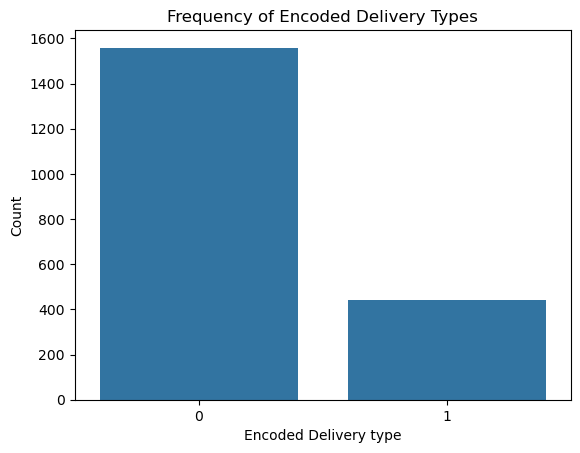

In [32]:
sns.countplot(x="ship-service-level", data=dff_new_encoded)
plt.xlabel("Encoded Delivery type")
plt.ylabel("Count")
plt.title("Frequency of Encoded Delivery Types")
plt.show()

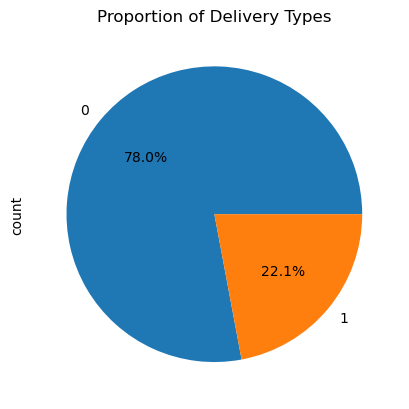

In [34]:
dff_new_encoded['ship-service-level'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Proportion of Delivery Types")
plt.show()